In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from models import *

In [2]:
NE = 600
ds = np.array([5, 10, 50, 100, 200, 300])
T_burn, Ks = 500, ds #(600 / ds).astype(int)

In [3]:
df = dict(tid=[], model=[], d=[], corr=[], perturbed=[], unperturbed=[], 
          spar1=[], spar2=[], spar3=[])

for i in range(1, 21):
    with open('results/pert_cmp_%d.pkl' % i, 'rb') as f:
        # EIres, FFres, err, syl = pickle.load(f)
        EIcorrs, FFcorrs, EIzs, FFzs, EIsparsity, FFsparsity = pickle.load(f)
        df['tid'].extend([i] * len(Ks) * 2)
        df['model'].extend(['EI'] * len(Ks) + ['FF'] * len(Ks))
        df['d'].extend(list(ds / NE * 100) * 2)
        df['corr'].extend(list(map(lambda x: x[T_burn:].max(axis=1).mean(), EIcorrs)))
        df['corr'].extend(list(map(lambda x: x[T_burn:].max(axis=1).mean(), FFcorrs)))
        df['perturbed'].extend(list(map(lambda x: x[0], EIzs)))
        df['perturbed'].extend(list(map(lambda x: x[0], FFzs)))
        df['unperturbed'].extend(list(map(lambda x: x[1], EIzs)))
        df['unperturbed'].extend(list(map(lambda x: x[1], FFzs)))
        
        for th in EIsparsity.keys():
            df['spar%d'%th].extend(EIsparsity[th].mean(axis=1) * 100)
            df['spar%d'%th].extend(FFsparsity[th].mean(axis=1) * 100)

In [4]:
df = pd.DataFrame(df)
df_z = df[['tid', 'model', 'd', 'perturbed', 'unperturbed']].copy()
df_z = df_z.melt(id_vars=[_ for _ in df_z.columns if 'pert' not in _], 
                 value_vars=['perturbed', 'unperturbed'], 
                 var_name='subgroup', value_name='z')

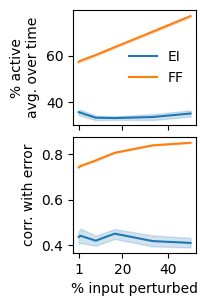

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(2, 3), sharex='all')
sns.lineplot(data=df, x='d', y='spar1', hue='model',legend='brief',  ax=ax[0])
sns.lineplot(data=df, x='d', y='corr', hue='model', legend=False, ax=ax[1])
ax[0].set(ylabel='% active\navg. over time')
ax[1].set(xlabel='% input perturbed', ylabel='corr. with error', xticks=[1, 20, 40])
ax[0].legend(frameon=False)
fig.tight_layout(pad=0.5)
fig.savefig('svg/sparse.svg')

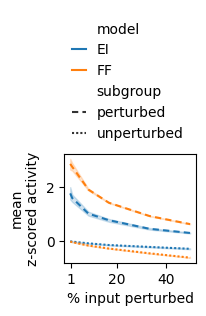

In [33]:
fig, ax = plt.subplots(2, figsize=(2, 3.1), sharex='all', height_ratios=[1, 1])
sns.lineplot(data=df_z, x='d', y='z', hue='model', style='subgroup', 
             dashes=[(3,2), (1,1)], ax=ax[1])
h, l = ax[1].get_legend_handles_labels()
ax[0].legend(handles=h, labels=l, loc='upper right', ncols=1, frameon=False, 
             handlelength=1, columnspacing=0.3)
ax[0].set_axis_off()
ax[1].get_legend().remove()
ax[1].set(xlabel='% input perturbed', ylabel='mean\nz-scored activity', xticks=[1, 20, 40])
fig.tight_layout(pad=0.5)
# fig.savefig('sparse2.svg')

In [7]:
i = 1
with open('results/pert_cmp_%d.pkl' % i, 'rb') as f:
    # EIres, FFres, err, syl = pickle.load(f)
    EIcorrs, FFcorrs, EIzs, FFzs, EIsparsity, FFsparsity = pickle.load(f)

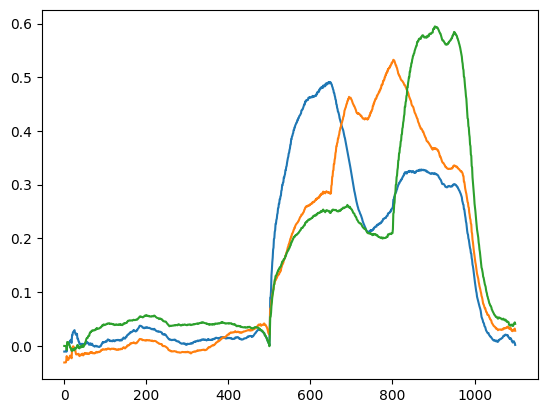

In [8]:
i = 5
plt.plot(EIcorrs[i])

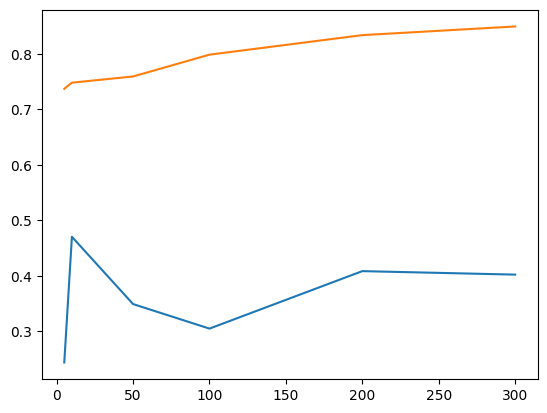

In [9]:
plt.plot(ds, list(map(lambda x: x[T_burn:].max(axis=1).mean(), EIcorrs)))
plt.plot(ds, list(map(lambda x: x[T_burn:].max(axis=1).mean(), FFcorrs)))

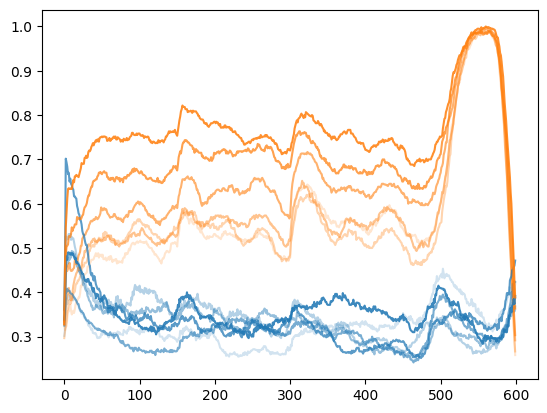

In [10]:
th = 1
for i, K in enumerate(ds):
    a = 0.2 + i/len(ds) * 0.8
    plt.plot(EIsparsity[th][i], color='C0', alpha=a);
    plt.plot(FFsparsity[th][i], color='C1', alpha=a);

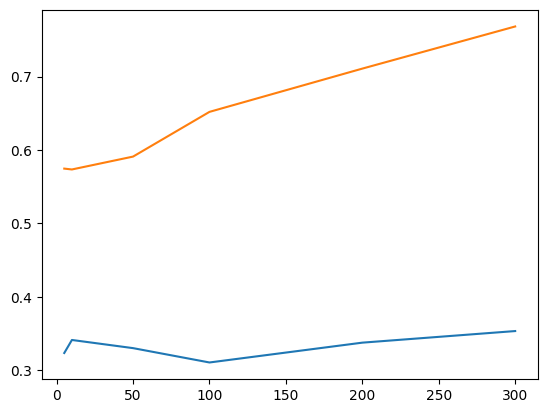

In [11]:
th = 1
plt.plot(Ks, EIsparsity[th].mean(axis=1))
plt.plot(Ks, FFsparsity[th].mean(axis=1))